# Uraperture
### A python script for calculating the diffraction pattern off an arbitrary aperture image.

## 1. Load and compute the diffraction pattern from a double helix.

The shape of the DNA molecule was discovered by observing its diffraction pattern. Using this script you can compute the intensity distribution of a double helix (or any aperture for that matter) by simply loading an image of the aperture.

Load the script.

In [2]:
import uraperture as urap

Set the path of the image as a string.

In [3]:
path = '/Folder/helix.jpg'

Uses the function **image_to_array** to convert an $N\times M$ pixel jpg image to a $N\times M$ numpy array.

In [4]:
aperture = urap.image_to_array(path)

The function **compute_intensity** returns an $N\times M$ numpy array of the screen intensity.

In [5]:
screen = urap.compute_intensity(aperture)

The intensity can be easily plotted using matplotlib.

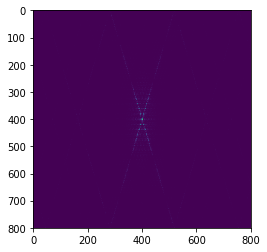

In [6]:
import matplotlib.pyplot as plt
plt.imshow(screen)

As you can see this doesn't produce the best looking graph. First of all it would be nice to zoom in and look at the interference pattern more closely. This is accomplished with the **crop** function.

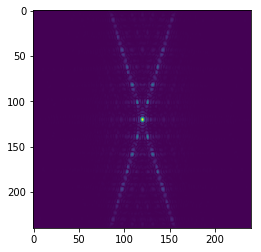

In [7]:
screen = urap.crop(screen, 0.3)
plt.imshow(screen)

Much better.
You can plot the aperture and the screen intensity side by side using the **plot** function.

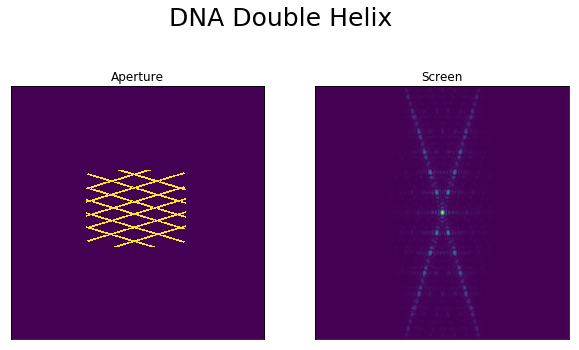

In [8]:
fig = urap.plot(aperture,screen, figsize=(10,6), title='DNA Double Helix', titlesize=25)
fig.show()

**figsize, title, titlesize** are all optional arguments.

## 2. Diffraction patterns of other well known apertures.

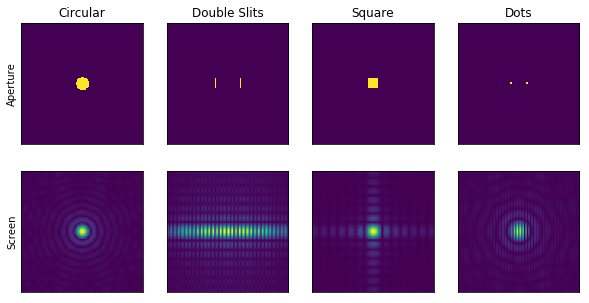

In [16]:
paths = ['/home/rusruskov/Documents/Fourier/Figures/circle.jpg',
         '/home/rusruskov/Documents/Fourier/Figures/doubleslit.jpg',
         '/home/rusruskov/Documents/Fourier/Figures/square.jpg',
         '/home/rusruskov/Documents/Fourier/Figures/dots.jpg']

apertures = [urap.image_to_array(path) for path in paths]
screens = [urap.crop(urap.compute_intensity(aperture),0.8) for aperture in apertures]
names = ['Circular', 'Double Slits', 'Square', 'Dots']

fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(241)
plt.imshow(apertures[0])
plt.title(names[0])
plt.ylabel('Aperture')
ax1.set_yticklabels([])
ax1.set_xticklabels([])
plt.xticks([])
plt.yticks([])

ax2 = plt.subplot(245)
plt.imshow(screens[0])
plt.ylabel('Screen')
ax2.set_yticklabels([])
ax2.set_xticklabels([])
plt.xticks([])
plt.yticks([])

for i in range(2,5):
    ax1 = plt.subplot(2,4,i)
    plt.title(names[i-1])
    plt.imshow(apertures[i-1])
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    plt.xticks([])
    plt.yticks([])

    ax2 = plt.subplot(2,4,i+4)
    plt.imshow(screens[i-1])
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])
    plt.xticks([])
    plt.yticks([])
    
fig.show()